
# Исследование объявлений о продаже квартир

В наличии были данные данные яндекс.недвижимость о продажах квартир в Санкт-Петербурге. Необходимо выявить зависимости между параметрами данными, проанализировать цены квартир.
 

## Описание данных
    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах(м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

   

## План выполнения:

1. [Открыли файл с данными и изучили общую информацию](#step_1)
2. [Предобработка данных](#step_2)
3. [Посчитали и добавили в таблицу](#step_3):
4. [Провели исследовательский анализ данных](#step_4):
    * Изучили следующие параметры: площадь, цена, число комнат, высота потолков. 
    * Изучили время продажи квартиры. 
    * Уберали редкие и выбивающиеся значения. 
    * Изучили, зависит ли цена от площади, числа комнат, удалённости от центра. 
    * Изучили зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
    * Изучили зависимость от даты размещения: дня недели, месяца и года.
    * Выбрали 10 населённых пунктов с наибольшим числом объявлений. 
    * Посчитали среднюю цену квадратного метра в этих населённых пунктах. 
    * Выделили среди них населённые пункты с самой высокой и низкой стоимостью жилья. 
    * Изучили предложения квартир. 
    * Выделили квартиры в Санкт-Петербурге. 
    * Построили график: он показыватет, как цена зависит от удалённости от центра. 
    * Выделили сегмент квартир в центре. 
    * Выделили факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).
5. [Написали общий вывод](#step_5).
    

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

<a id='step_1'></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib as plt
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Данные, поступившие для обработки были разделены знаком '\t'. 22 наименования колонок. Среди них есть как числовые, так и символьные типы данных. В некоторых присутствуют пропуски.

### Шаг 2. Предобработка данных

<a id='step_2'></a>

Нулями заполнили графы с количеством балконов и этажей. Отутствие количества балконов, скорее всего означает просто их отсутствие в квартире. Отсутствие количества этажей - одноэтажность дома.

 <a id='step_2'></a>

In [2]:
# заполнение пропущенных значений нулями
data.isnull().sum()
data['balcony'] = data['balcony'].fillna(0)
data['floors_total'] = data['floors_total'].fillna(0)
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для разных населённых пунктов пропущенные значения параметров заполнили медианой в соответствии с населённым пунктом. Для некоторых маленьких посёлков данных для расчёта медианого значения нет, поэтому заменили их на медиану по всем объектам.

Отдалённость от центра или аэропорта в маленьких посёлках и сёлах просто неизвестна: что является центром села? Так как эти и подобные данные про расстояния до объектов заполнялись автоматически, то в том алгоритме,возможно, недостаточно ориентиров для более редких случаев.

In [3]:
# заполнение пропущенных значений медианой
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    data.loc[(data['locality_name'] == locality_name) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = median
    
data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = data['cityCenters_nearest'].median()    
data.groupby('locality_name')['cityCenters_nearest'].median()   

locality_name
Бокситогорск            13101.0
Волосово                13101.0
Волхов                  13101.0
Всеволожск              13101.0
Выборг                  13101.0
                         ...   
село Путилово           13101.0
село Рождествено        13101.0
село Русско-Высоцкое    13101.0
село Старая Ладога      13101.0
село Шум                13101.0
Name: cityCenters_nearest, Length: 364, dtype: float64

In [4]:
# заполнение пропущенных значений медианой
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'airports_nearest'].median()
    data.loc[(data['locality_name'] == locality_name) & (data['airports_nearest'].isna()), 'airports_nearest'] = median
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].median()        
data.groupby('locality_name')['airports_nearest'].median() 

locality_name
Бокситогорск            26757.5
Волосово                26757.5
Волхов                  26757.5
Всеволожск              26757.5
Выборг                  26757.5
                         ...   
село Путилово           26757.5
село Рождествено        26757.5
село Русско-Высоцкое    26757.5
село Старая Ладога      26757.5
село Шум                26757.5
Name: airports_nearest, Length: 364, dtype: float64

Расстояние до водоёмов и парков заполняли по той же логике, что и расстояние до центра города. 

In [5]:
# заполнение пропущенных значений медианой
for locality_name in data['locality_name'].unique():
    median_park = data.loc[data['locality_name'] == locality_name, 'parks_nearest'].median()
    data.loc[(data['locality_name'] == locality_name) & (data['parks_nearest'].isna()), 'parks_nearest'] = median_park
    median_pound = data.loc[data['locality_name'] == locality_name, 'parks_nearest'].median()
    data.loc[(data['locality_name'] == locality_name) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = median_pound
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = data['parks_nearest'].median()    
data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = data['ponds_nearest'].median()  
data.groupby('locality_name')['parks_nearest'].median()  

locality_name
Бокситогорск            460.0
Волосово                460.0
Волхов                  460.0
Всеволожск              460.0
Выборг                  460.0
                        ...  
село Путилово           460.0
село Рождествено        460.0
село Русско-Высоцкое    460.0
село Старая Ладога      460.0
село Шум                460.0
Name: parks_nearest, Length: 364, dtype: float64

Количество парков и водоёмов вблизи 3км от объекта заполняли медианным значением.


In [6]:
# заполнение пропущенных значений медианой
for locality_name in data['locality_name'].unique():
    median_park = data.loc[data['locality_name'] == locality_name, 'parks_around3000'].median()
    try:
        data.loc[(data['locality_name'] == locality_name) & (data['parks_around3000'].isna()), 'parks_around3000'] = round(median_park)
    except: 
        data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = int(data['parks_around3000'].median() )      
    median_pound = data.loc[data['locality_name'] == locality_name, 'ponds_around3000'].median()
    try:
        data.loc[(data['locality_name'] == locality_name) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = round(median_pound)
    except:
        data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = int(data['ponds_around3000'].median() )       
data.groupby('locality_name')['ponds_around3000'].median()  

locality_name
Бокситогорск            1.0
Волосово                1.0
Волхов                  1.0
Всеволожск              1.0
Выборг                  1.0
                       ... 
село Путилово           1.0
село Рождествено        1.0
село Русско-Высоцкое    1.0
село Старая Ладога      1.0
село Шум                1.0
Name: ponds_around3000, Length: 364, dtype: float64

Пропущенные значения в столбце "размер кухни" заполнили нулями там, где продаваемый лот является квартирой-студией.
Далее заполняем медианным значениям, группируя данные по количеству комнат в квартире.

In [7]:
# заполнение пропущенных значений 
data.loc[(data['studio'] == True)&(data['kitchen_area'].isna()),'kitchen_area'] = 0

for rooms in data['rooms'].unique():
    median = data.loc[data['rooms'] == rooms, 'kitchen_area'].median()
    data.loc[(data['rooms'] == rooms) & (data['kitchen_area'].isna()), 'kitchen_area'] = median
    
data['kitchen_area'].isna().sum()
data.query('studio == True')[['kitchen_area', 'total_area']].head()

,kitchen_area,total_area
144,0.0,27.00
440,0.0,27.11
608,0.0,25.00
697,0.0,24.10
716,0.0,17.00


Среди данных нет критерия, по которому можно было бы определить высоту потолков(например, год постройки дома). Поэтому заполним пропуски медианой.

In [8]:
# заполнение пропущенных значений медианой
data['ceiling_height'].median()
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].isna().sum()

0

Пропуски параметра "жилая площадь" можно заполнить вычислениями: общая площадь без площади кухни.

In [9]:
# заполнение пропущенных данных с помощью данных из других столбцов таблицы
print('Корреляция между площадью квартиры и жилой площадью:', data['living_area'].corr(data['total_area'])) # дополнила
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] - data['kitchen_area']
data['living_area'].isna().sum()


Корреляция между площадью квартиры и жилой площадью: 0.9395373338721491


0

Некоторые типы данных можно изменить:
 - int - количество комнат, парков, водоёмов, балконов, этажей в доме, дней продажи;
 - bool - апартаменты или нет(1 или 0);
 - datetime - дата выставления квартиры на продажу.

In [10]:
# изменили тип данных там, где это необходимо
data['rooms'] = pd.to_numeric(data['rooms'])
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

data['is_apartment'] = data['is_apartment'].astype('bool')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around3

Количество дней, в течение которых выложено было объявление, тоюе были пропуски. Предположили, что эти объявления ещё не закрыты. Поэтому датой закрытия считаем день, самый поздний среди данных.

2019-05-03 00:00:00


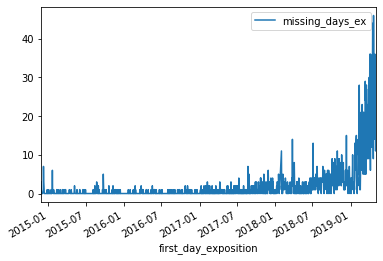

In [11]:
# Построение графика пропусков в столбце с количеством дней продажи квартиры
test_data = data
test_data['missing_days_ex'] = data['days_exposition'].isna().astype(int)
test_data.groupby('first_day_exposition').agg({'missing_days_ex':'sum'}).plot(legend=True)

test_data[['days_exposition', 'first_day_exposition']].head(20)
print(data['first_day_exposition'].max())

In [12]:
max_date = data['first_day_exposition'].max()
data.loc[data['days_exposition'].isna(),'days_exposition'] = (max_date - data.loc[data['days_exposition'].isna(),'first_day_exposition']).dt.days
data['days_exposition'] = data['days_exposition'].astype('int')
data.isna().sum()


total_images             0
last_price               0
total_area               0
first_day_exposition     0
rooms                    0
ceiling_height           0
floors_total             0
living_area              0
floor                    0
is_apartment             0
studio                   0
open_plan                0
kitchen_area             0
balcony                  0
locality_name           49
airports_nearest         0
cityCenters_nearest      0
parks_around3000         0
parks_nearest            0
ponds_around3000         0
ponds_nearest            0
days_exposition          0
missing_days_ex          0
dtype: int64

### Шаг 3. Посчитайте и добавьте в таблицу

<a id='step_3'></a>

Цена квадратного метра:

In [13]:
data['price_for_metr'] = data['last_price'] / data['total_area']
data['price_for_metr'].head()

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: price_for_metr, dtype: float64

День недели, месяц и год, когда объект был выставлен на продажу:

In [14]:
data['weekday_public'] = data['first_day_exposition'].dt.weekday
data['month_public'] = data['first_day_exposition'].dt.month
data['year_public'] = data['first_day_exposition'].dt.year
data[['year_public', 'weekday_public', 'month_public','first_day_exposition']].head()

,year_public,weekday_public,month_public,first_day_exposition
0,2019,3,3,2019-03-07
1,2018,1,12,2018-12-04
2,2015,3,8,2015-08-20
3,2015,4,7,2015-07-24
4,2018,1,6,2018-06-19


Категоризация этажей, на которых расположены квартиры:

In [15]:
def floor_group(data):
    total_floors = data['floors_total']
    floor = data['floor']
    if floor == 1:
        return 'Первый'
    if floor == total_floors:
        return 'Последний'
    return 'Другой'

data['floor_group'] = data.apply(floor_group, axis = 1)
data[['floor_group', 'floors_total','floor']]

,floor_group,floors_total,floor
0,Другой,16,8
1,Первый,11,1
2,Другой,5,4
3,Другой,14,9
4,Другой,14,13
...,...,...,...
23694,Другой,5,3
23695,Другой,5,4
23696,Первый,3,1
23697,Другой,17,12


Отношение жилой площади и кухни к общей площади квартиры:

In [16]:
data['living_to_total'] = data['price_for_metr'] = data['living_area'] / data['total_area']
data['kitchen_to_total'] = data['price_for_metr'] = data['kitchen_area'] / data['total_area']
data[['kitchen_to_total','living_to_total', 'kitchen_area','total_area' ]]

,kitchen_to_total,living_to_total,kitchen_area,total_area
0,0.231481,0.472222,25.00,108.00
1,0.272277,0.460396,11.00,40.40
2,0.148214,0.612500,8.30,56.00
3,0.059748,0.940252,9.50,159.00
4,0.410000,0.320000,41.00,100.00
...,...,...,...,...
23694,0.103356,0.547792,13.83,133.81
23695,0.144068,0.644068,8.50,59.00
23696,0.155203,0.523810,8.80,56.70
23697,0.303583,0.696417,23.30,76.75


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<a id='step_4'></a>

#### Построили гисрограммы для следующих параметров:

In [17]:
# Функция для построения гистрограммы и выведения максимальных и минимальных значений
def print_hist(value):
    val_max = value.max()
    val_min = value.min()
    delta = val_max - val_min
    value.plot(kind = 'hist', bins=100, grid=True, legend = True)
    print('Максимальное значение ',val_max)
    print('Минимальное значение ',val_min)
    print('Медианное значение ',value.median())
    print('Среднее значение ',value.mean())


Максимальное значение  900.0
Минимальное значение  12.0
Медианное значение  52.0
Среднее значение  60.34865099793241


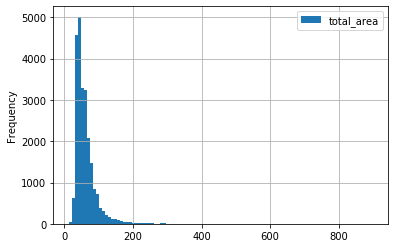

In [18]:
# Общая площадь квартиры
print_hist(data['total_area'])    

На гистограмме присутствует длинный участок, что говорит о наличии выбросов среди данных.

Максимальное значение  763000000.0
Минимальное значение  12190.0
Медианное значение  4650000.0
Среднее значение  6541548.771551542


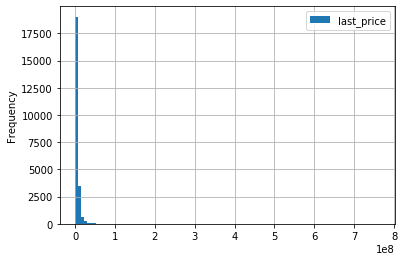

In [19]:
# Цена
print_hist(data['last_price'])    


На гистограмме присутствует длинный участок, что говорит о наличии выбросов среди данных.

Максимальное значение  19
Минимальное значение  0
Медианное значение  2.0
Среднее значение  2.070635891809781


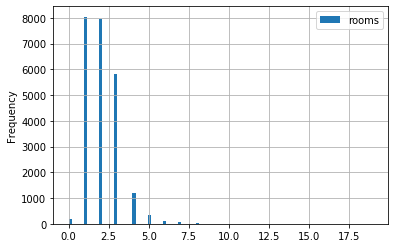

In [20]:
# Количество комнат
print_hist(data['rooms'])  

Количество комнат в среднем не превышает 5, но присутствуют исключения.

Максимальное значение  100.0
Минимальное значение  1.0
Медианное значение  2.65
Среднее значение  2.724358411747331


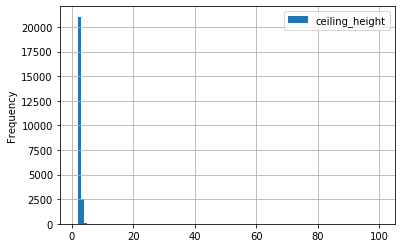

In [21]:
# Высота потолков в квартире
print_hist(data['ceiling_height'])  

Высота потолков примерно одинаковая в большинстве квартир. Но есть какие то аномальные значения.

Максимальное значение  1618
Минимальное значение  0
Медианное значение  94.0
Среднее значение  185.8217224355458


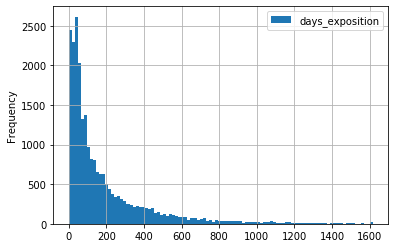

In [22]:
# Время продажи квартиры
print_hist(data['days_exposition']) 

При анализе данных выяснили, что обычно продажа квартиры занимает 94 дня. Быстрая продажа квартир - до 100 днейб долгая - больше 200 дней. Не исключена более долгая продажа квартиры, но это уже зависит от данных объекта. 

#### Фильтрация данных от редких и выбивающихся значений:

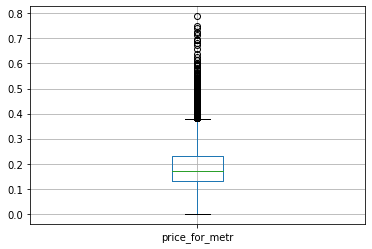

In [23]:
import matplotlib.pyplot as plt 
data.boxplot(column = 'price_for_metr')

In [24]:
print(data['price_for_metr'].describe())
print('95 прецентиль =', data['price_for_metr'].quantile(0.95))
print('5 прецентиль =', data['price_for_metr'].quantile(0.05))
good_data = data.query('0.095 < price_for_metr < 0.316')


count    23699.000000
mean         0.186482
std          0.075764
min          0.000000
25%          0.133056
50%          0.172131
75%          0.232143
max          0.787879
Name: price_for_metr, dtype: float64
95 прецентиль = 0.31590641478523523
5 прецентиль = 0.09496853122127147


После анализа цены за квадратный метр квартиры, отсеяли часть значений, кторые выходят за 95 прецентиль. Таких значений оказалось не очень много.

count    21321.000000
mean       182.136673
std        228.412888
min          0.000000
25%         43.000000
50%         93.000000
75%        232.000000
max       1618.000000
Name: days_exposition, dtype: float64
95 прецентиль = 668.0
5 прецентиль = 8.0


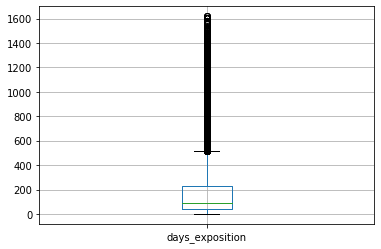

In [25]:
print(good_data['days_exposition'].describe())
good_data.boxplot(column = 'days_exposition')
print('95 прецентиль =', data['days_exposition'].quantile(0.95))
print('5 прецентиль =', data['days_exposition'].quantile(0.05))
good_data = good_data.query('8 < days_exposition < 668')

Затем, отфильтровали объекты, которые продавались слишком долго (больше 668 дней) или слишком быстро (меньше 8 дней).

Количество строк в исходных данных: 23699
Количество строк в срезе данных по цене кв.метра: 19220


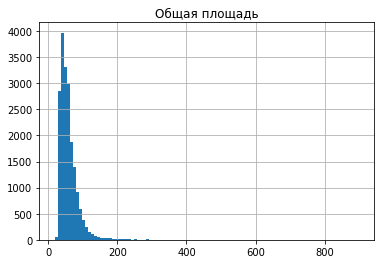

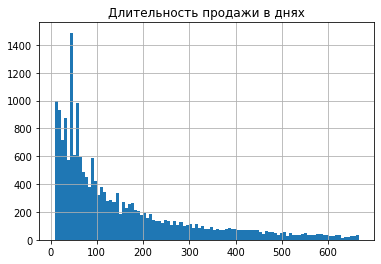

In [26]:
print('Количество строк в исходных данных:', len(data))
print('Количество строк в срезе данных по цене кв.метра:', len(good_data))
good_data['total_area'].hist(bins = 100)
plt.title('Общая площадь')
plt.show()
good_data['days_exposition'].hist(bins = 100)
plt.title('Длительность продажи в днях')
plt.show()

По последний двум гистаграммам видно, что после удаления выбросов вид распределения поменялся. Мы избавились от нестандартных случаев, которые лишь помешали бы анализу данных. 

#### Факторы, влияющие на стоимость квартир.

Коэффициент корреляции между ценой и площадью квартиры: 0.6895132396528586
Коэффициент корреляции между ценой квартиры и количеством комнат: 0.3781157558403865
Коэффициент корреляции между ценой квартиры и удалённостью от центра: -0.18985806129777125


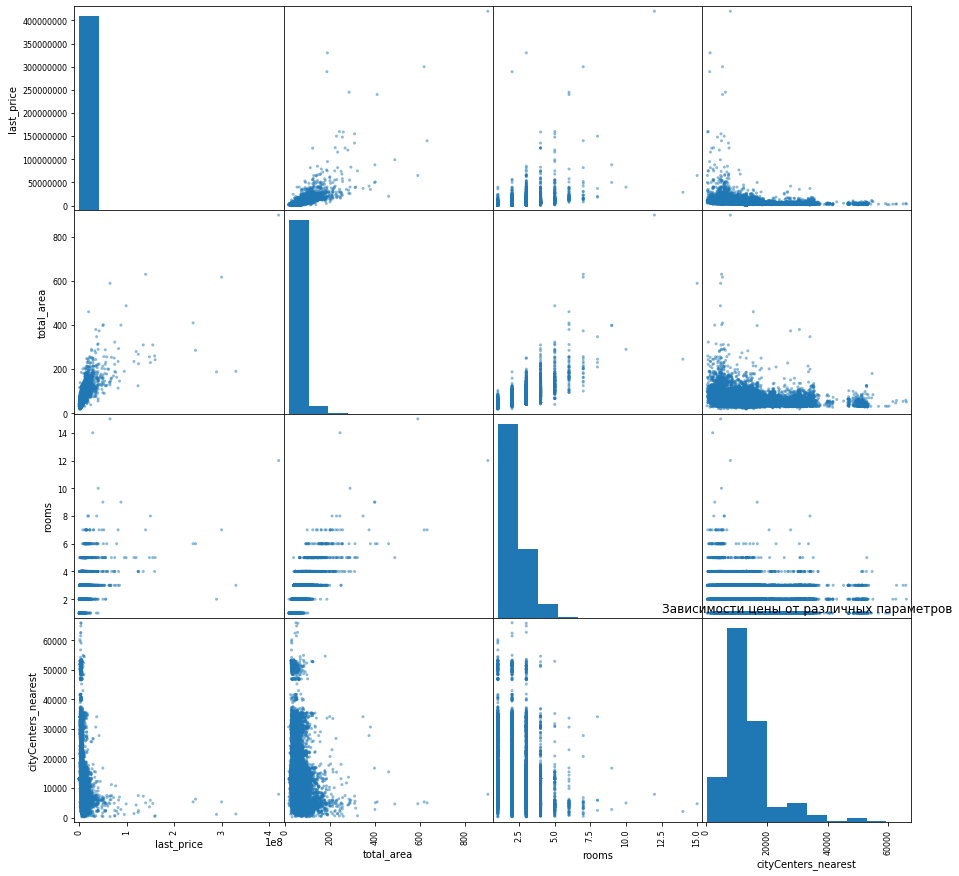

In [27]:
# Зависимость цены квартиры от её площади

pd.plotting.scatter_matrix(good_data[['last_price', 'total_area','rooms', 'cityCenters_nearest']], figsize=(15, 15)) 
plt.title('Зависимости цены от различных параметров')
print('Коэффициент корреляции между ценой и площадью квартиры:',good_data['last_price'].corr(good_data['total_area']))
print('Коэффициент корреляции между ценой квартиры и количеством комнат:',good_data['last_price'].corr(good_data['rooms']))
print('Коэффициент корреляции между ценой квартиры и удалённостью от центра:',good_data['last_price'].corr(good_data['cityCenters_nearest']))


Text(0.5, 1.0, 'Зависимость цены квартиры от этажа')

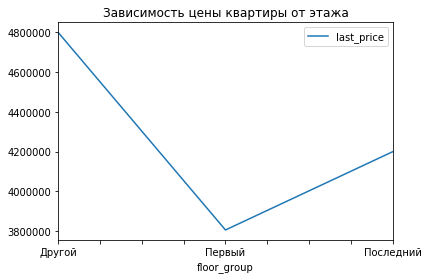

In [28]:
# Зависимость цены от этажа
good_data.groupby('floor_group').agg({'last_price':'median'}).plot()
plt.title('Зависимость цены квартиры от этажа')

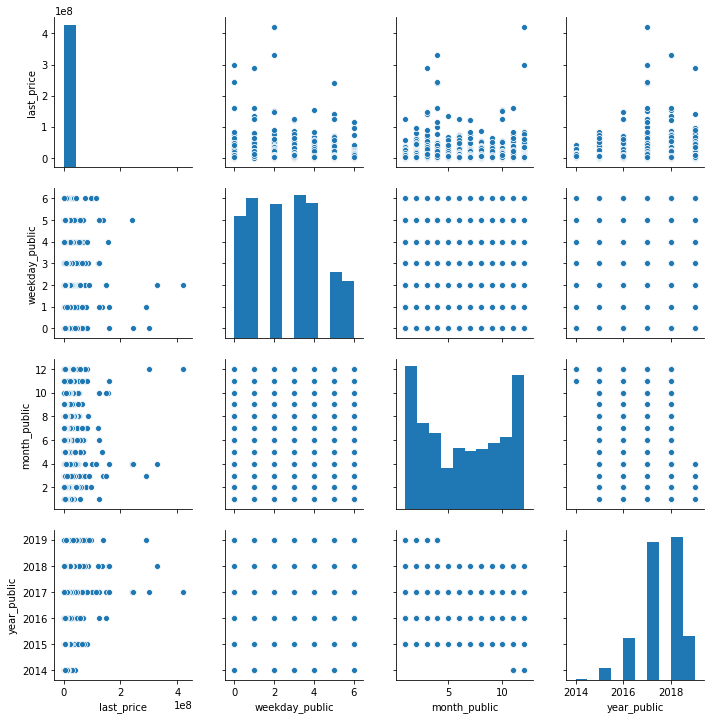

In [29]:
# Зависимость цены от дня недели, месяца и года выставления квартиры на продажу 
#pd.plotting.scatter_matrix(good_data[['last_price', 'weekday_public','month_public', 'year_public']], figsize=(15, 15)) 
#plt.show()

sns.pairplot(good_data[['last_price', 'weekday_public','month_public', 'year_public']])
plt.show()

##### После анализа коэфициента корреляции и графиков зависимости было выявлено:
    - между ценой квартиры и её площадью прямая зависимость: чем больше квартира, тем дороже;
    - между ценой квартиры и количеством комнат нет линейной зависимости: студии чаще всего дешевле, чем квартиры с несколькими комнатами. Но квартиры с несколькими комнатами могут сильно отличаться по площади, следовательно разнятся их цены;
    - между ценой квартиры и удалённостью её от центра существует обратная зависимость: чем дальше хвартира от центра, тем она дешевле;
    - цены квартир, находящихся на первых и последних этажах ниже, чем цены квартир на остальных этажах;
    - цена квартиры не зависит от дня недели или месяцы, в который её выставили на продажу. Но заметна зависимость цены от года, в который её начали продавать. Чем раньше выставлена квартира на продажу, тем она дешевле.

#### 10 населённых пунктов.

In [30]:
good_data_10 = good_data.groupby('locality_name').agg({'total_area':'count','price_for_metr':'mean',
                                                       'last_price':['max','min']}).sort_values(by = ('total_area','count'), ascending = False).head(10)
good_data_10

total_area price_for_metr   last_price           
                       count           mean          max        min
locality_name                                                      
Санкт-Петербург        12640       0.180940  420000000.0  1200000.0
посёлок Мурино           383       0.238256    7940000.0  1730000.0
посёлок Шушары           379       0.199746   10990000.0  1780000.0
Всеволожск               333       0.186739   24412900.0  1353000.0
Пушкин                   294       0.174718   42000000.0  1990000.0
Колпино                  292       0.169444   36900000.0  2100000.0
Гатчина                  256       0.167408   13900000.0   850000.0
посёлок Парголово        242       0.210472    9140000.0  1800000.0
деревня Кудрово          213       0.231389   13000000.0  2222222.0
Выборг                   197       0.166244   19990000.0   690000.0

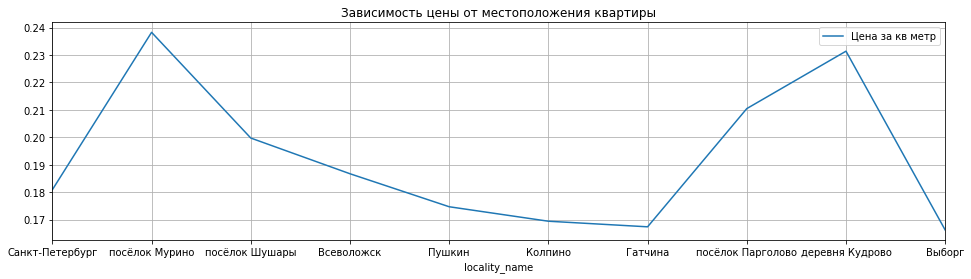

In [31]:
good_data_10.plot(y = ('price_for_metr','mean'), figsize = (16,4), grid = True, legend = True, label = 'Цена за кв метр')
plt.title('Зависимость цены от местоположения квартиры')
plt.show()

Выше перечислены населённые пункты, в которых больше всего объектов продавалось. 
Исходя из средних значений, дороже всего квадратный матр в Кудрово и в Мурино. Самый дорогой лот был в Санкт-Петербурге, а самый дешёвый - в Выборге.

#### Изучение предложений в Санкт-Петербурге 

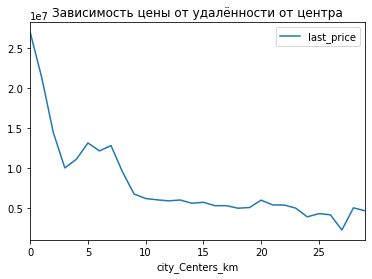

In [32]:
good_data_spb = good_data.query("locality_name == 'Санкт-Петербург'") 
good_data_spb['city_Centers_km'] = round(good_data_spb['cityCenters_nearest'] / 1000)
km_price = good_data_spb.pivot_table(index = 'city_Centers_km', values = 'last_price', aggfunc = 'mean')
km_price.plot()
plt.title('Зависимость цены от удалённости от центра')
plt.show()

На графике зависимости цены на квартиры от расстояния до центра виден перелом в районе 10 км. Принимаем это значение за центр города. 

#### Квартиры в центре Санкт-Петербурга

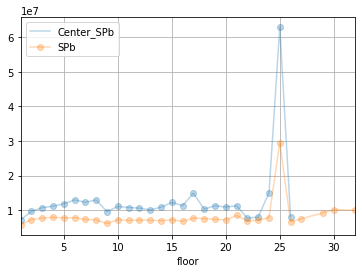

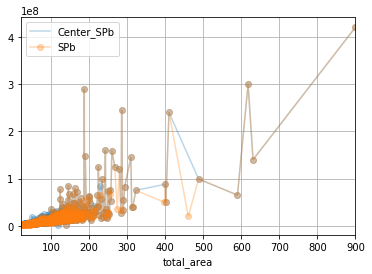

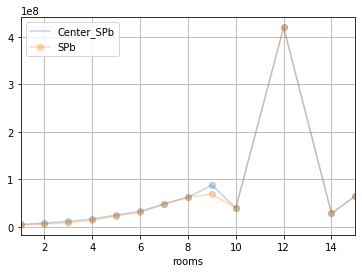

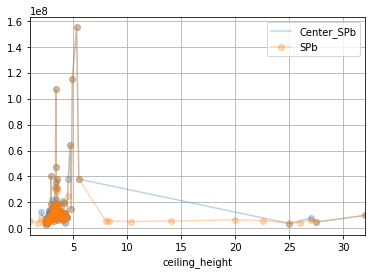

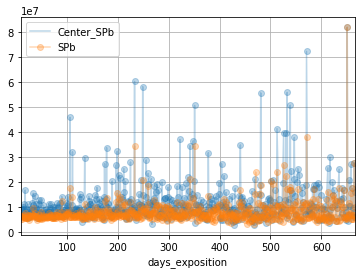

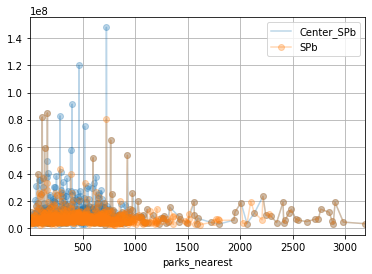

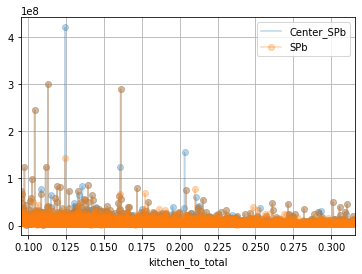

In [33]:
good_data_spb_center = good_data_spb.query("city_Centers_km <= 10") 
columns = ['floor','total_area','rooms','ceiling_height',  'days_exposition', 'parks_nearest', 'kitchen_to_total']
for column in columns:
    good_data_spb_center.groupby(column)['last_price'].mean().plot(style='o-', grid=True, label = 'Center_SPb', legend =True, alpha=0.3)
    good_data_spb.groupby(column)['last_price'].mean().plot(style='o-',grid=True, label = 'SPb', legend =True, alpha=0.3)
    plt.show()
   

Коэффициент корреляции между ценой и площадью квартиры: 0.7066781970587003
Коэффициент корреляции между ценой квартиры и количеством комнат: 0.39541226823138165
Коэффициент корреляции между ценой квартиры и удалённостью от центра: -0.1728749666724015


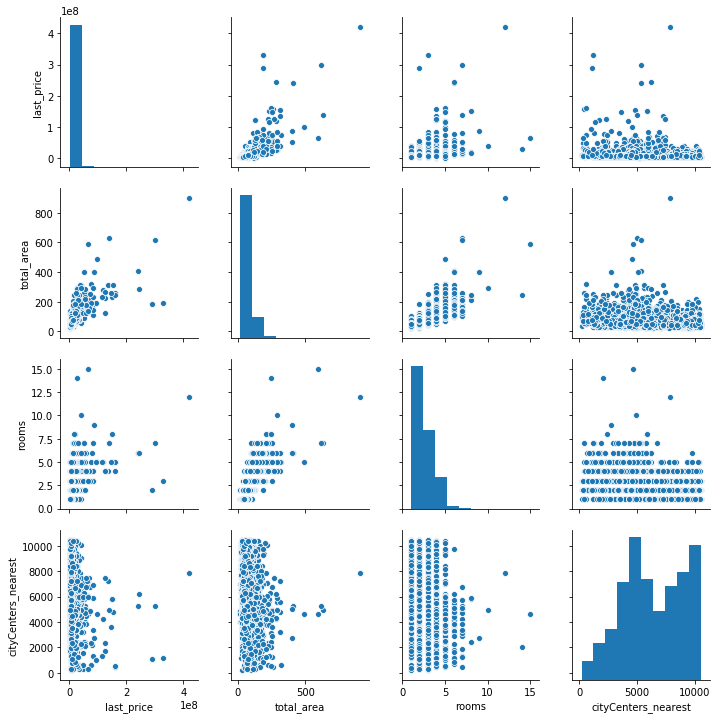

In [34]:
print('Коэффициент корреляции между ценой и площадью квартиры:',good_data_spb_center['last_price'].corr(good_data_spb_center['total_area']))
print('Коэффициент корреляции между ценой квартиры и количеством комнат:',good_data_spb_center['last_price'].corr(good_data_spb_center['rooms']))
print('Коэффициент корреляции между ценой квартиры и удалённостью от центра:',good_data_spb_center['last_price'].corr(good_data_spb_center['cityCenters_nearest']))
sns.pairplot(good_data_spb_center[['last_price', 'total_area','rooms', 'cityCenters_nearest']]) 


Анализ стоимости квартир от различных параметров:
    - в среднем цена на квартиры в центре и по СПб не сильно особо зависит от этажа. Но есть скачок цен на 25 этаж;
    - с ростом площади квартир, цена на них растёт;
    - с ростом комнат увеличивается стоимость квартир, но есть аномально доогие 12-комнатные квартиры;
    - цена квартир не зависит от высоты потолка, как в центре города, так и на окраинах;
    - в центре близость к паркам и водоёмам чаще влияет на цену.
    
Исходя из графиков, оцениваемые параметры одинаково влияют на цену квартир по всему городу и в центре. Просто цена квартир в центре в среднем немного выше.    

### Шаг 5. Общий вывод

<a id='step_5'></a>

После анализа данных из Яндекс.Недвижимость были сделаны слдующие выводы:

    - в полученных данных были пропуски и в графахБ заполняемых продавцами квартиры, и в данных, заполняемых автоматически;
    - цена квартиры имеет прямую зависимость от её прлощади;
    - цена квартиры имеет обратную зависимость от расстояния до центра;
    - чем раньше размещено объявление, тем дешевле объект, зачастую;
    - расстояние до ближайших водоёмов, парков и аэропортов не сильно влияет на цены квартир;
    - квартиры на первых и последних этажах дешевле, чем квартиры на других этажах;
    - число комнат не влияет на стоимость квартир, влияет площадь.